In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

In [3]:
with pd.HDFStore('train.h5') as train:
    df = train.get('train').sort_values(by=['id','timestamp'])
df.head()

,id,timestamp,derived_0,derived_1,derived_2,derived_3,derived_4,fundamental_0,fundamental_1,fundamental_2,...,technical_36,technical_37,technical_38,technical_39,technical_40,technical_41,technical_42,technical_43,technical_44,y
131062,0,167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.007108
131895,0,168,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001950
132728,0,169,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.017724
133561,0,170,-0.230583,0.488096,0.93592,0.028222,-0.083071,-0.240929,NaN,0.212425,...,0.727659,0.0,0.0,0.0,-0.160478,NaN,0.0,0.0,NaN,0.012934
134393,0,171,-0.230583,0.488096,0.93592,0.028222,-0.083071,-0.240929,NaN,0.212425,...,0.727659,0.0,0.0,0.0,-0.160478,NaN,0.0,0.0,NaN,-0.025229


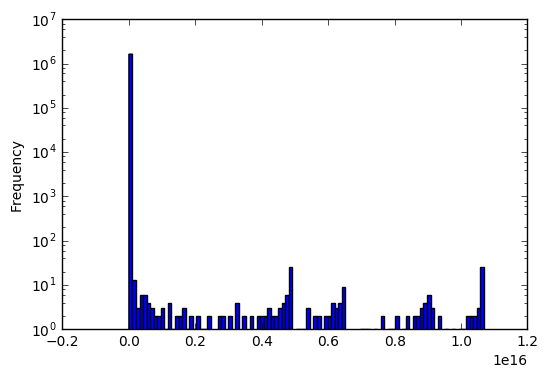

In [7]:
df.derived_1.plot(kind='hist',bins=100,logy=True)

In [8]:
X = df.drop(['id','timestamp','y'],axis=1).fillna(0)
y = df.y

1710756
1693648


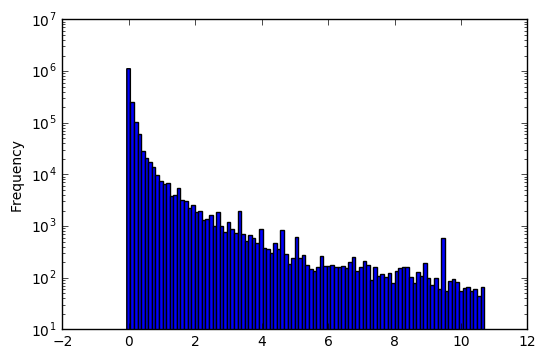

In [45]:
X = df.loc[:,['derived_1']].fillna(0)
print(len(X))
mask = (X.derived_1 > X.derived_1.quantile(0.005)) & (X.derived_1 < X.derived_1.quantile(0.995)) 
X = X[mask]
print(len(X))
y = df.y[mask]
X.derived_1.plot(kind='hist',bins=100,logy=True)

In [51]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso, RANSACRegressor
lasso = Lasso(fit_intercept=True,alpha=1e-4,copy_X=False,selection='random')
model = RANSACRegressor(lasso)
model.fit(X,y)

RANSACRegressor(base_estimator=Lasso(alpha=0.0001, copy_X=False, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='random', tol=0.0001, warm_start=False),
        is_data_valid=None, is_model_valid=None, loss='absolute_loss',
        max_trials=100, min_samples=None, random_state=None,
        residual_metric=None, residual_threshold=None, stop_n_inliers=inf,
        stop_probability=0.99, stop_score=inf)

In [53]:
print("y = %.5f + %.5f * x" % (model.estimator_.intercept_,model.estimator_.coef_))

y = -0.00040 + -0.00000 * x


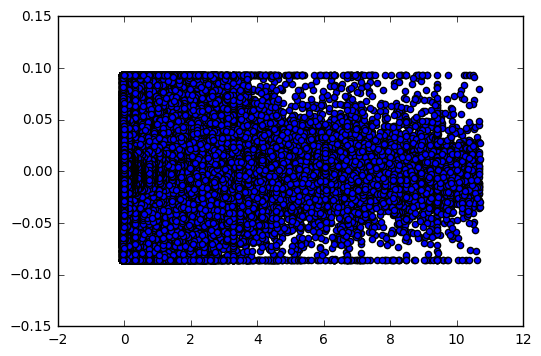

In [54]:
plt.scatter(X,y)

In [ ]:
cols = ['derived_0', 'derived_1', 'derived_2', 'derived_3', 'derived_4', 'fundamental_0', 'fundamental_1', 'fundamental_2', 'fundamental_3', 'fundamental_5', 'fundamental_6', 'fundamental_7', 'fundamental_8', 'fundamental_9', 'fundamental_10', 'fundamental_11', 'fundamental_12', 'fundamental_13', 'fundamental_14', 'fundamental_15', 'fundamental_16', 'fundamental_17', 'fundamental_18', 'fundamental_19', 'fundamental_20', 'fundamental_21', 'fundamental_22', 'fundamental_23', 'fundamental_24', 'fundamental_25', 'fundamental_26', 'fundamental_27', 'fundamental_28', 'fundamental_29', 'fundamental_30', 'fundamental_31', 'fundamental_32', 'fundamental_33', 'fundamental_34', 'fundamental_35', 'fundamental_36', 'fundamental_37', 'fundamental_38', 'fundamental_39', 'fundamental_40', 'fundamental_41', 'fundamental_42', 'fundamental_43', 'fundamental_44', 'fundamental_45']
X = df.loc[:,cols[:5]]
y = df.y
X.fillna(X.median(),inplace=True);

In [ ]:
from sklearn.linear_model import ElasticNet
enet = ElasticNet(l1_ratio=0.1, alpha= 0.1,fit_intercept=True,normalize=True)

In [ ]:
from sklearn.model_selection import validation_curve
param_range = np.logspace(-3,1,5)
train_scores, test_scores = validation_curve(enet, X, y, param_name="alpha", param_range=param_range, cv=3, n_jobs=3, verbose=2)

In [ ]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with SVM")
plt.xlabel("$\gamma$")
plt.ylabel("Score")
plt.ylim(-0.1, 0.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

In [ ]:
train_scores_mean

In [ ]:
test_scores_mean

In [ ]:
enet.fit(X,y)

In [ ]:
enet.score(X,y)

In [ ]:
df.corrwith(df.y)